In [2]:
library(monocle3)
library(Seurat)
library(dplyr)
library(biomaRt)
library(stringr)
library(SCORPIUS)
library(ggplot2)
library(cowplot)
library(RColorBrewer)
library(scales)

In [3]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"

In [4]:
integrated_meta = read.table(paste(out, "integrated_annotations.txt", sep = ""))

In [10]:
cols = read.csv("../Table/celltype_colors.csv")

In [48]:
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector    = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))

In [45]:
PlotUMAP <- function(obj, annotate, lX, lY, text_width, n.col, plot_leg = FALSE, cols2use = NULL){

    options(repr.plot.width = 3, repr.plot.height = 3)
    par(mar = c(4, 4, 1, 1), xpd=FALSE)
    umap = as.data.frame(Embeddings(obj[["umap"]]))
    umap$clusters = obj@meta.data[match(rownames(umap), rownames(obj@meta.data)), annotate]
    
    qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
    col_vector    = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
    my_color_palette <- hue_pal()(length(unique(umap$clusters)))
    
    if(length(cols2use) > 0){colrs = data.frame(clusters = unique(umap$clusters), color = cols2use)}
    else{colrs = data.frame(clusters = sort(unique(umap$clusters)), color = my_color_palette)}
    umap$color = colrs[match(umap$clusters, colrs$clusters), "color"]
    

    
    plot(umap[, 1], umap[, 2],
         pch = 19, 
         xlab = "UMAP1",
         ylab = "UMAP2",
         col = umap$color,
         cex = .1,
         las = 1)

    if( plot_leg == TRUE){
        legend(lX, lY,
               legend = colrs$clusters,
               col    = colrs$color,
               pch    = rep(16, nrow(colrs)),
               cex=.9,
               bg="transparent",
               box.lty = 0,
               y.intersp = 1.75,
               ncol = n.col,
               x.intersp = 1.15,
               text.width = text_width)
    }
    
    return(colrs)
    
}

In [65]:
PlotFractionCellsStudy <- function(obj, res){

    options(repr.plot.width = 8, repr.plot.height = 6)
    
    par(mfrow = c(2, 1), mar = c(4, 5, 1, 1))
    data = t(table(obj@meta.data[, res], obj@meta.data$study))
    data = data[c(2, 1), ]
    barplot(data, col = c("#2c6954", "#e0e093"), las = 1, ylab = "N cells", xlab = "Cluster") #, , ylim = c(0, 80000))

    data = t(table(obj@meta.data[, res], obj@meta.data$Assigned_cluster))
    barplot(data, col = cols[cols$celltype %in% sort(unique(obj@meta.data$Assigned_cluster)), "col"], las = 1, ylab = "N cells", xlab = "Cluster") #, ylim = c(0, 12000))
}

# Cluster 0

In [5]:
pseudotime_meta = read.table(paste(out, "integrated_cluster0_pseudotime.txt", sep = ""))

In [6]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"
f = paste(out, "obj.integrated.frazer.melton_cluster0_seurat_obj", sep = "")
load(f, verbose = T)

Loading objects:
  integrated.C0_test


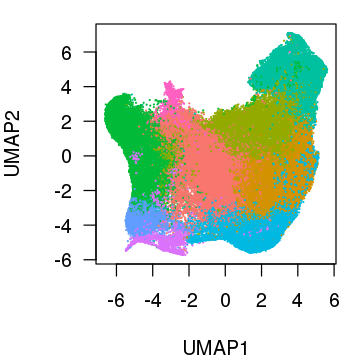

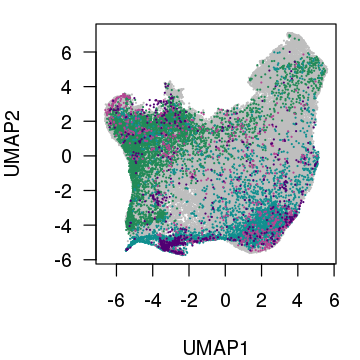

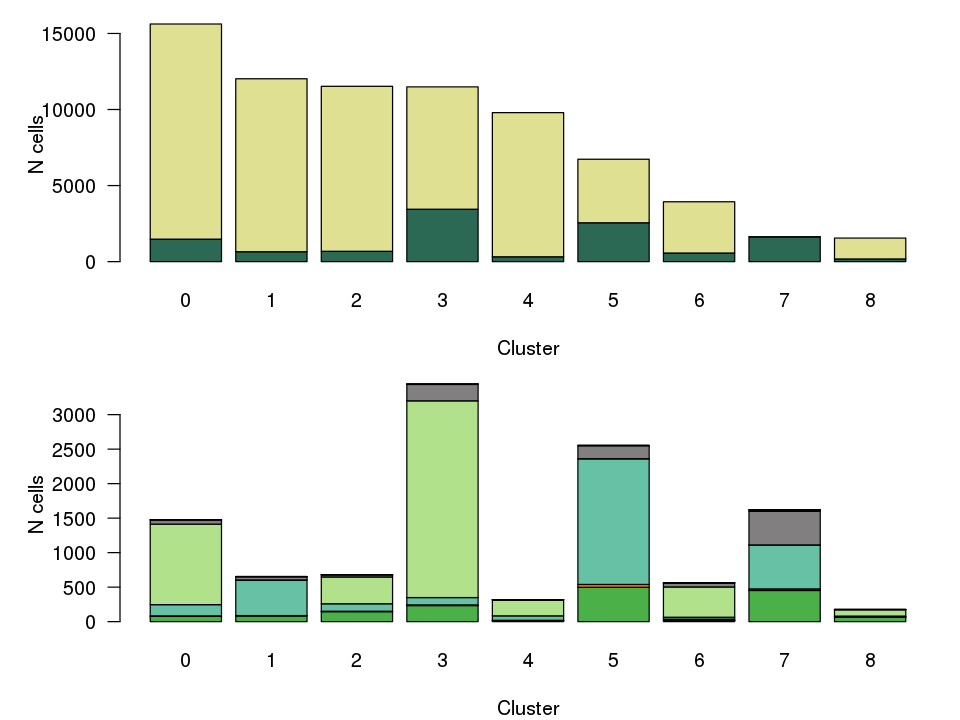

In [69]:
x = PlotUMAP(integrated.C0_test, "RNA_snn_res.0.3", -2, 0, text_width = 3, n.col = 2, plot_leg = F) #, cols2use = c("#d49100","#c9c230","#ede99a", "#a39000"))
x = PlotUMAP(integrated.C0_test, "Stage", -2, 0, text_width = 3, n.col = 2, plot_leg = F, cols2use = c("grey", "#228a57", "#108f8f", "#b54592", "#500073"))
PlotFractionCellsStudy(integrated.C0_test, "RNA_snn_res.0.3")

# Cluster 1

In [67]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"
f = paste(out, "obj.integrated.frazer.melton_cluster1_seurat_obj", sep = "")
load(f, verbose = T)

Loading objects:
  integrated.C1


In [85]:
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes

integrated.C1 <- CellCycleScoring(integrated.C1, s.features = s.genes, g2m.features = g2m.genes, set.ident = FALSE)

In [87]:
table(integrated.C1@meta.data$Phase)


  G1  G2M    S 
6003 5609 3845 

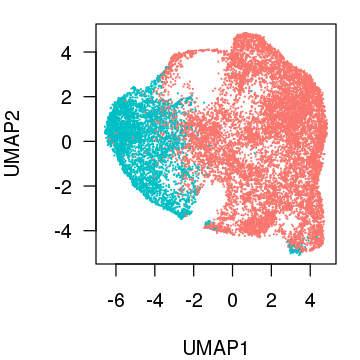

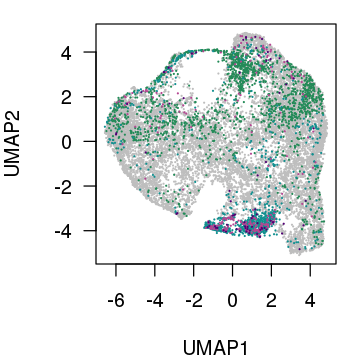

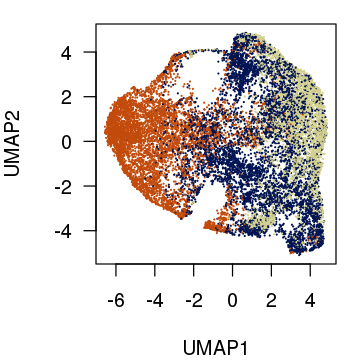

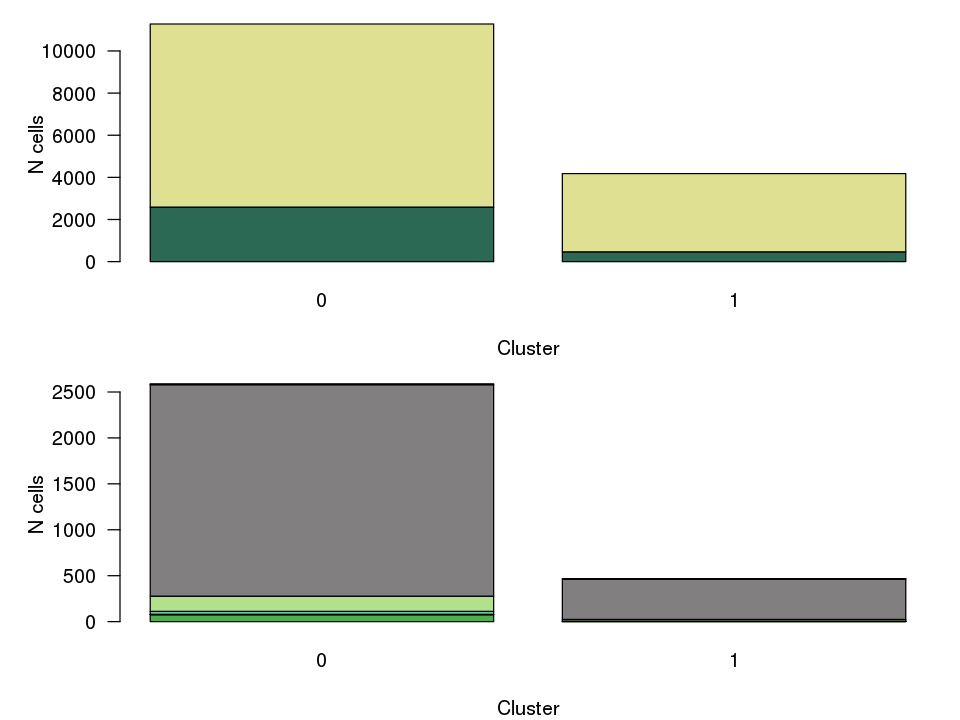

In [99]:
x = PlotUMAP(integrated.C1, "RNA_snn_res.0.05", -2, 0, text_width = 3, n.col = 2, plot_leg = F) #, cols2use = c("#d49100","#c9c230","#ede99a", "#a39000"))
x = PlotUMAP(integrated.C1, "Stage", -2, 0, text_width = 3, n.col = 2, plot_leg = F, cols2use = c("grey", "#228a57", "#108f8f", "#b54592", "#500073"))
x = PlotUMAP(integrated.C1, "Phase", -2, 0, text_width = 3, n.col = 2, plot_leg = F, cols2use = c("#c24b0c", "#001352", "#d4d190"))
PlotFractionCellsStudy(integrated.C1, "RNA_snn_res.0.05")

# Cluster 2

In [70]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"
f = paste(out, "obj.integrated.frazer.melton_cluster2_seurat_obj", sep = "")
load(f, verbose = T)

Loading objects:
  integrated.C2


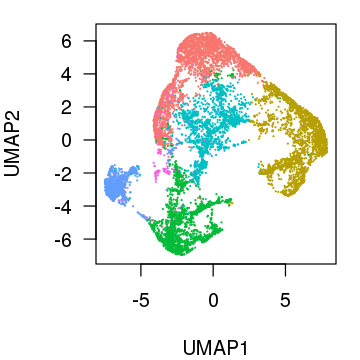

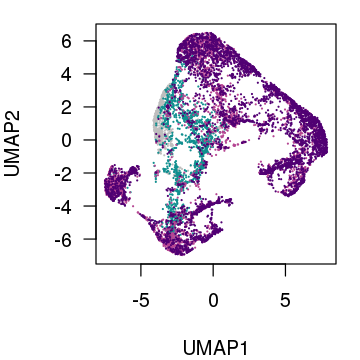

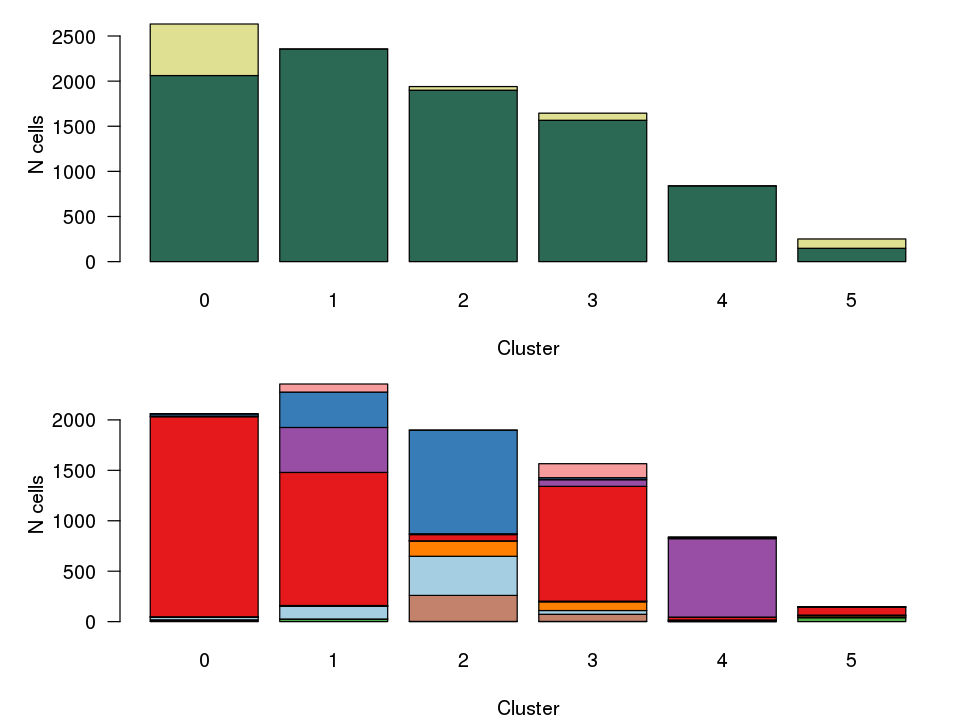

In [75]:
x = PlotUMAP(integrated.C2, "RNA_snn_res.0.1", -2, 0, text_width = 3, n.col = 2, plot_leg = F) #, cols2use = c("#d49100","#c9c230","#ede99a", "#a39000"))
x = PlotUMAP(integrated.C2, "Stage", -2, 0, text_width = 3, n.col = 2, plot_leg = F, cols2use = c("grey", "#108f8f", "#b54592", "#500073"))
PlotFractionCellsStudy(integrated.C2, "RNA_snn_res.0.1")

# Output

In [81]:
out = "../Figures/Manuscript_V04/Figure_S1_"

In [82]:
png(paste(out, "UMAP_bySubcluster_cluster0.png"), width = 3, height = 3, units = "in", res = 1200)
x = PlotUMAP(integrated.C0_test, "RNA_snn_res.0.3", -2, 0, text_width = 3, n.col = 2, plot_leg = F) #, cols2use = c("#d49100","#c9c230","#ede99a", "#a39000"))
dev.off()

png(paste(out, "UMAP_byStage_cluster0.png"), width = 3, height = 3, units = "in", res = 1200)
x = PlotUMAP(integrated.C0_test, "Stage", -2, 0, text_width = 3, n.col = 2, plot_leg = F, cols2use = c("grey", "#228a57", "#108f8f", "#b54592", "#500073"))
dev.off()

pdf(paste(out, "Cluster0_Barplot.pdf"), width = 8, height = 6)
PlotFractionCellsStudy(integrated.C0_test, "RNA_snn_res.0.3")
dev.off()

png 
  2

png 
  2

png 
  2

In [83]:
png(paste(out, "UMAP_bySubcluster_cluster1.png"), width = 3, height = 3, units = "in", res = 1200)
x = PlotUMAP(integrated.C1, "RNA_snn_res.0.05", -2, 0, text_width = 3, n.col = 2, plot_leg = F) #, cols2use = c("#d49100","#c9c230","#ede99a", "#a39000"))
dev.off()

png(paste(out, "UMAP_byStage_cluster1.png"), width = 3, height = 3, units = "in", res = 1200)
x = PlotUMAP(integrated.C1, "Stage", -2, 0, text_width = 3, n.col = 2, plot_leg = F, cols2use = c("grey", "#228a57", "#108f8f", "#b54592", "#500073"))
dev.off()

pdf(paste(out, "Cluster1_Barplot.pdf"), width = 8, height = 6)
PlotFractionCellsStudy(integrated.C1, "RNA_snn_res.0.05")
dev.off()

png 
  2

png 
  2

png 
  2

In [100]:
png(paste(out, "UMAP_byPhase_cluster1.png"), width = 3, height = 3, units = "in", res = 1200)
x = PlotUMAP(integrated.C1, "Phase", -2, 0, text_width = 3, n.col = 2, plot_leg = F, cols2use = c("#c24b0c", "#001352", "#d4d190"))
dev.off()

png 
  2

In [84]:
png(paste(out, "UMAP_bySubcluster_cluster2.png"), width = 3, height = 3, units = "in", res = 1200)
x = PlotUMAP(integrated.C2, "RNA_snn_res.0.1", -2, 0, text_width = 3, n.col = 2, plot_leg = F) #, cols2use = c("#d49100","#c9c230","#ede99a", "#a39000"))
dev.off()

png(paste(out, "UMAP_byStage_cluster2.png"), width = 3, height = 3, units = "in", res = 1200)
x = PlotUMAP(integrated.C2, "Stage", -2, 0, text_width = 3, n.col = 2, plot_leg = F, cols2use = c("grey", "#108f8f", "#b54592", "#500073"))
dev.off()

pdf(paste(out, "Cluster2_Barplot.pdf"), width = 8, height = 6)
PlotFractionCellsStudy(integrated.C2, "RNA_snn_res.0.1")
dev.off()

png 
  2

png 
  2

png 
  2